In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

features = pd.read_csv("combinedData.csv")

features = features.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
features.head()

player class   season pos school_name conf_abbr     g  \
0          Stephen Curry    JR  2008-09   G    Davidson  Southern  34.0   
1            J.J. Redick    SR  2005-06   G        Duke       ACC  36.0   
2  Justin Wright-Foreman    SR  2018-19   G     Hofstra       CAA  35.0   
3         Doug McDermott    SR  2013-14   F   Creighton  Big East  35.0   
4          Stephen Curry    SO  2007-08   G    Davidson  Southern  36.0   

       mp   fg  fga  fg2  fg2a  fg3  fg3a   ft  fta   orb    drb  trb  ast  \
0  1145.0  312  687  182   351  130   336  220  251  21.0  130.0  151  189   
1  1336.0  302  643  163   313  139   330  221  256   7.0   64.0   71   95   
2  1321.0  330  646  220   387  110   259  178  206  12.0  129.0  141  102   
3  1181.0  330  627  234   413   96   214  178  206  57.0  187.0  244   55   
4  1193.0  317  656  155   287  162   369  135  151  28.0  137.0  165  104   

   stl  blk    tov    pf  pts   per  obpm  dbpm  bpm  ts_pct  efg_pct  \
0   86    8  126.0  81.0  974   NaN   NaN   NaN  NaN   0.604    0.549   
1   52    2   90.0  54.0  964   NaN   NaN   NaN  NaN   0.630    0.578   
2   30    7   91.0  67.0  948  28.9   7.0  -3.7  3.2   0.637    0.596   
3    8    5   62.0  67.0  934  32.8   9.8  -1.6  8.2   0.644    0.603   
4   73   14   93.0  85.0  931   NaN   NaN   NaN  NaN   0.640    0.607   

   orb_pct  drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  usg_pct  \
0      NaN      NaN      6.9     40.2      NaN      0.6     13.5     38.3   
1      NaN      NaN      3.1     15.8      NaN      0.1     10.5     31.5   
2      1.2     11.5      6.6     17.4      1.3      0.6     10.9     33.0   
3      6.4     17.8     12.6     11.5      0.4      0.5      7.9     36.2   
4      NaN      NaN      NaN      NaN      NaN      NaN     11.3      NaN   

   off_rtg  def_rtg  ows  dws    ws  pprod  year_drafted  round  pick_overall  \
0      NaN      NaN  6.4  3.6   9.9    NaN          2009      1             7   
1      NaN      NaN  6.7  1.0   7.8    NaN          2006      1            11   
2    123.8    108.7  6.3  1.0   7.4  844.0          2019      2            53   
3    127.4    106.0  6.3  1.4   7.7  788.0          2014      1            11   
4      NaN      NaN  7.0  3.3  10.3    NaN          2009      1             7   

   allStar  
0        1  
1        0  
2        0  
3        0  
4        1

In [41]:
features.describe()

g           mp           fg          fga          fg2  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     32.715029   923.905010   148.290176   308.607027   115.977228   
std       5.154462   276.627857    61.284209   127.608411    54.633689   
min       3.000000    24.000000     1.000000     4.000000     1.000000   
25%      31.000000   785.000000   107.000000   224.000000    76.000000   
50%      34.000000   989.000000   153.000000   315.000000   115.000000   
75%      36.000000  1120.000000   190.000000   400.000000   153.000000   
max      40.000000  1474.000000   330.000000   703.000000   297.000000   

              fg2a          fg3         fg3a           ft          fta  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean    220.934288    32.312947    87.672739    91.301236   124.964216   
std      98.062030    30.024388    75.467658    48.704743    62.068852   
min       3.000000     0.000000     0.000000     0.000000     0.000000   
25%     149.000000     4.000000    15.000000    54.000000    79.000000   
50%     223.000000    26.000000    76.000000    87.000000   120.000000   
75%     286.000000    52.000000   144.000000   123.000000   165.000000   
max     615.000000   162.000000   380.000000   249.000000   336.000000   

               orb          drb          trb          ast          stl  \
count  1537.000000  1537.000000  1537.000000  1537.000000  1537.000000   
mean     52.164606   125.005856   177.170462    71.150293    33.904359   
std      32.159204    57.870978    83.929206    53.276672    18.652750   
min       1.000000     3.000000     5.000000     0.000000     0.000000   
25%      25.000000    84.000000   115.000000    33.000000    20.000000   
50%      47.000000   118.000000   164.000000    58.000000    31.000000   
75%      74.000000   159.000000   227.000000    95.000000    45.000000   
max     197.000000   369.000000   504.000000   331.000000   126.000000   

               blk          tov           pf          pts         per  \
count  1537.000000  1537.000000  1537.000000  1537.000000  855.000000   
mean     25.411191    63.160052    72.256994   420.194535   21.157661   
std      25.505567    26.116409    21.195203   178.031377    5.378865   
min       0.000000     1.000000     1.000000     2.000000   -1.700000   
25%       7.000000    45.000000    60.000000   298.000000   17.800000   
50%      17.000000    64.000000    73.000000   433.000000   21.200000   
75%      34.000000    79.000000    87.000000   543.000000   24.700000   
max     186.000000   170.000000   138.000000   974.000000   40.800000   

             obpm        dbpm         bpm       ts_pct      efg_pct  \
count  743.000000  743.000000  743.000000  1537.000000  1537.000000   
mean     4.011171    3.144145    7.154778     0.566571     0.531889   
std      2.900817    2.374883    3.520548     0.052379     0.057562   
min    -10.500000   -3.700000   -6.900000     0.250000     0.200000   
25%      2.150000    1.600000    4.900000     0.536000     0.496000   
50%      4.100000    2.900000    7.400000     0.567000     0.531000   
75%      5.850000    4.500000    9.400000     0.599000     0.567000   
max     12.800000   11.700000   20.000000     0.740000     0.728000   

          orb_pct     drb_pct      trb_pct      ast_pct    stl_pct  \
count  855.000000  855.000000  1339.000000  1339.000000  855.00000   
mean     6.634152   15.796257    11.359149    14.715907    2.09193   
std      4.050177    5.631031     4.422831     8.616445    0.93558   
min      0.300000    5.600000     3.000000     0.000000    0.00000   
25%      3.100000   11.500000     7.600000     8.500000    1.50000   
50%      6.000000   14.800000    11.000000    12.700000    1.90000   
75%      9.700000   19.600000    14.700000    19.400000    2.55000   
max     23.100000   35.600000    25.700000    53.300000    8.00000   

           blk_pct      tov_pct      usg_pct     off_rtg     def_rtg  \
count  1339.000

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 49 columns):
player          1537 non-null object
class           1536 non-null object
season          1537 non-null object
pos             1537 non-null object
school_name     1537 non-null object
conf_abbr       1537 non-null object
g               1537 non-null float64
mp              1537 non-null float64
fg              1537 non-null int64
fga             1537 non-null int64
fg2             1537 non-null int64
fg2a            1537 non-null int64
fg3             1537 non-null int64
fg3a            1537 non-null int64
ft              1537 non-null int64
fta             1537 non-null int64
orb             1537 non-null float64
drb             1537 non-null float64
trb             1537 non-null int64
ast             1537 non-null int64
stl             1537 non-null int64
blk             1537 non-null int64
tov             1537 non-null float64
pf              1537 non-null float64
pts        

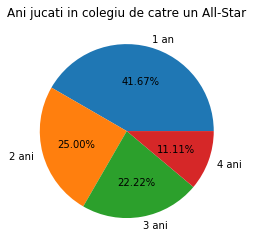

In [43]:
allStars = features[features["allStar"] == 1]
allStars = allStars.groupby(["year_drafted", "round", "pick_overall"])["player"].count()
allStars = allStars.value_counts()
plt.pie(allStars, labels=["1 an", "2 ani", "3 ani", "4 ani"], autopct='%1.2f%%')
plt.title("Ani jucati in colegiu de catre un All-Star")
plt.show()

In [44]:
# features = features.dropna()
features = features.fillna(features.median())
features.head()

player class   season pos school_name conf_abbr     g  \
0          Stephen Curry    JR  2008-09   G    Davidson  Southern  34.0   
1            J.J. Redick    SR  2005-06   G        Duke       ACC  36.0   
2  Justin Wright-Foreman    SR  2018-19   G     Hofstra       CAA  35.0   
3         Doug McDermott    SR  2013-14   F   Creighton  Big East  35.0   
4          Stephen Curry    SO  2007-08   G    Davidson  Southern  36.0   

       mp   fg  fga  fg2  fg2a  fg3  fg3a   ft  fta   orb    drb  trb  ast  \
0  1145.0  312  687  182   351  130   336  220  251  21.0  130.0  151  189   
1  1336.0  302  643  163   313  139   330  221  256   7.0   64.0   71   95   
2  1321.0  330  646  220   387  110   259  178  206  12.0  129.0  141  102   
3  1181.0  330  627  234   413   96   214  178  206  57.0  187.0  244   55   
4  1193.0  317  656  155   287  162   369  135  151  28.0  137.0  165  104   

   stl  blk    tov    pf  pts   per  obpm  dbpm  bpm  ts_pct  efg_pct  \
0   86    8  126.0  81.0  974  21.2   4.1   2.9  7.4   0.604    0.549   
1   52    2   90.0  54.0  964  21.2   4.1   2.9  7.4   0.630    0.578   
2   30    7   91.0  67.0  948  28.9   7.0  -3.7  3.2   0.637    0.596   
3    8    5   62.0  67.0  934  32.8   9.8  -1.6  8.2   0.644    0.603   
4   73   14   93.0  85.0  931  21.2   4.1   2.9  7.4   0.640    0.607   

   orb_pct  drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  usg_pct  \
0      6.0     14.8      6.9     40.2      1.9      0.6     13.5     38.3   
1      6.0     14.8      3.1     15.8      1.9      0.1     10.5     31.5   
2      1.2     11.5      6.6     17.4      1.3      0.6     10.9     33.0   
3      6.4     17.8     12.6     11.5      0.4      0.5      7.9     36.2   
4      6.0     14.8     11.0     12.7      1.9      1.8     11.3     22.9   

   off_rtg  def_rtg  ows  dws    ws  pprod  year_drafted  round  pick_overall  \
0    114.1     97.9  6.4  3.6   9.9  425.0          2009      1             7   
1    114.1     97.9  6.7  1.0   7.8  425.0          2006      1            11   
2    123.8    108.7  6.3  1.0   7.4  844.0          2019      2            53   
3    127.4    106.0  6.3  1.4   7.7  788.0          2014      1            11   
4    114.1     97.9  7.0  3.3  10.3  425.0          2009      1             7   

   allStar  
0        1  
1        0  
2        0  
3        0  
4        1

In [45]:
import random

allStars = features[features["allStar"] == 1]
theRest = features[features["allStar"] == 0]
theRest = theRest.sample(n=600, random_state=1)
features = pd.concat([allStars, theRest])
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 1164
Data columns (total 49 columns):
player          673 non-null object
class           673 non-null object
season          673 non-null object
pos             673 non-null object
school_name     673 non-null object
conf_abbr       673 non-null object
g               673 non-null float64
mp              673 non-null float64
fg              673 non-null int64
fga             673 non-null int64
fg2             673 non-null int64
fg2a            673 non-null int64
fg3             673 non-null int64
fg3a            673 non-null int64
ft              673 non-null int64
fta             673 non-null int64
orb             673 non-null float64
drb             673 non-null float64
trb             673 non-null int64
ast             673 non-null int64
stl             673 non-null int64
blk             673 non-null int64
tov             673 non-null float64
pf              673 non-null float64
pts             673 non-null int64
p

In [46]:
features.describe()

g           mp          fg         fga         fg2  \
count  673.000000   673.000000  673.000000  673.000000  673.000000   
mean    32.876672   936.898960  150.884101  313.120357  118.031204   
std      4.891800   256.921336   58.927429  120.975163   54.209118   
min      4.000000    28.000000    3.000000    6.000000    3.000000   
25%     31.000000   810.000000  110.000000  232.000000   79.000000   
50%     33.000000   999.000000  155.000000  318.000000  115.000000   
75%     36.000000  1118.000000  190.000000  394.000000  154.000000   
max     40.000000  1436.000000  317.000000  687.000000  297.000000   

             fg2a         fg3        fg3a          ft         fta         orb  \
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000   
mean   224.239227   32.852897   88.881129   94.560178  129.095097   54.163447   
std     94.599473   30.132654   75.451444   48.249627   61.559301   33.190647   
min      6.000000    0.000000    0.000000    3.000000    3.000000    1.000000   
25%    156.000000    4.000000   17.000000   59.000000   84.000000   27.000000   
50%    221.000000   28.000000   77.000000   89.000000  124.000000   50.000000   
75%    286.000000   53.000000  146.000000  126.000000  170.000000   77.000000   
max    509.000000  162.000000  369.000000  249.000000  331.000000  197.000000   

              drb        trb         ast         stl         blk         tov  \
count  673.000000  673.00000  673.000000  673.000000  673.000000  673.000000   
mean   129.121842  183.28529   73.726597   35.028232   25.747400   64.777117   
std     59.733411   87.04430   52.484999   17.966672   26.164687   25.569541   
min      5.000000    7.00000    0.000000    1.000000    0.000000    1.000000   
25%     87.000000  120.00000   38.000000   21.000000    8.000000   46.000000   
50%    120.000000  170.00000   61.000000   32.000000   18.000000   65.000000   
75%    164.000000  235.00000   96.000000   45.000000   34.000000   80.000000   
max    369.000000  504.00000  324.000000   97.000000  186.000000  167.000000   

               pf         pts         per        obpm        dbpm         bpm  \
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000   
mean    73.638930  429.181278   21.394502    4.200743    3.035661    7.456018   
std     20.763237  171.941547    3.847504    1.793312    1.629949    2.330210   
min      1.000000   11.000000    6.400000   -5.600000   -3.500000   -4.200000   
25%     61.000000  305.000000   21.100000    4.100000    2.900000    7.400000   
50%     75.000000  437.000000   21.200000    4.100000    2.900000    7.400000   
75%     87.000000  552.000000   21.500000    4.100000    2.900000    7.400000   
max    138.000000  974.000000   40.800000   12.800000   11.700000   20.000000   

           ts_pct     efg_pct     orb_pct     drb_pct     trb_pct     ast_pct  \
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000   
mean     0.569749    0.534061    6.442348   15.413224   11.479792   14.873403   
std      0.051555    0.056582    3.054949    4.320703    4.290300    8.034429   
min      0.367000    0.316000    0.600000    5.800000    3.200000    0.000000   
25%      0.537000    0.499000    5.700000   14.700000    8.200000    9.600000   
50%      0.570000    0.530000    6.000000   14.800000   11.000000   12.700000   
75%      0.603000    0.570000    6.500000   15.100000   14.500000   18.800000   
max      0.728000    0.725000   19.800000   35.600000   25.400000   50.000000   

          stl_pct     blk_pct     tov_pct     usg_pct     off_rtg     def_rtg  \
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000   
mean     2.018574    2.562110   15.207578   23.156018  114.202526   97.542051   
std      0.694641    2.520518    4.098092    4.324050    6.927141    4.536479   
min      0.400000    0.000000    5.800000   11.500000   71.500000   77.700000   
25%      1.900000    0.900000   12.500000   20.600000  114.100000   9

In [47]:
# create per_game stats and drop the normal stats
features["pts_pg"] = features["pts"] / features["g"]
features["fg_p"] = features["fg"] / features["fga"]
features["fg2_p"] = features["fg2"] / features["fg2a"]
features["fg3_p"] = features["fg3"] / ( features["fg3a"]  +.000000001)
features["ft_p"] = features["ft"] / (features["fta"] + +.000000001)
features["trb_p"] = features["trb"] / features["g"]
features["ast_p"] = features["ast"] / features["g"]
features["stl_p"] = features["stl"] / features["g"]
features["blk_p"] = features["blk"] / features["g"]

features = features.drop(columns=list_normal_stats)

NameError: name 'list_normal_stats' is not defined

In [48]:
mean_statistics = features.groupby(["allStar"]).mean()
mean_statistics.head(40)

g          mp          fg         fga         fg2  \
allStar                                                              
0        32.858333  933.448333  148.658333  310.466667  115.515000   
1        33.027397  965.260274  169.178082  334.931507  138.712329   

               fg2a        fg3       fg3a          ft         fta        orb  \
allStar                                                                        
0        220.610000  33.143333  89.856667   92.170000  125.805000  52.663333   
1        254.068493  30.465753  80.863014  114.205479  156.136986  66.493151   

                drb         trb        ast        stl        blk        tov  \
allStar                                                                       
0        125.775000  178.438333  72.113333  34.086667  24.745000  63.698333   
1        156.630137  223.123288  86.986301  42.767123  33.986301  73.643836   

                pf         pts        per      obpm      dbpm       bpm  \
allStar                                                                   
0        73.051667  422.630000  21.232500  4.156333  3.010667  7.373167   
1        78.465753  483.027397  22.726027  4.565753  3.241096  8.136986   

           ts_pct   efg_pct   orb_pct    drb_pct    trb_pct   ast_pct  \
allStar                                                                 
0        0.567343  0.531658  6.427667  15.338000  11.297167  14.50550   
1        0.589521  0.553808  6.563014  16.031507  12.980822  17.89726   

          stl_pct   blk_pct    tov_pct    usg_pct     off_rtg    def_rtg  \
allStar                                                                    
0        2.000833  2.541833  15.134000  23.011000  114.111167  97.679167   
1        2.164384  2.728767  15.812329  24.347945  114.953425  96.415068   

              ows       dws        ws       pprod  year_drafted     round  \
allStar                                                                     
0        2.361667  1.806167  4.168333  421.390000   2011.490000  1.575000   
1        3.083562  2.567123  5.646575  443.082192   2008.287671  1.109589   

         pick_overall     pts_pg      fg_p     fg2_p     fg3_p      ft_p  \
allStar                                                                    
0           33.060000  12.804688  0.482130  0.518550  0.307474  0.723661   
1           11.561644  14.597018  0.514707  0.544277  0.292954  0.721872   

            trb_p     ast_p     stl_p     blk_p  
allStar                                          
0        5.412668  2.190918  1.038984  0.749082  
1        6.626119  2.630329  1.290684  0.993383

In [49]:
def plotGroupBarPlot(data, feature_list):
    df = data.loc[feature_list]
    df.plot(kind="bar")
    plt.show()

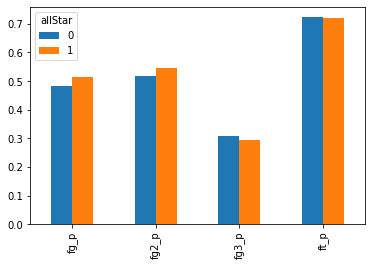

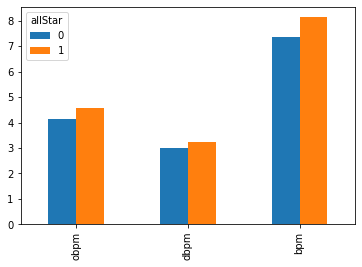

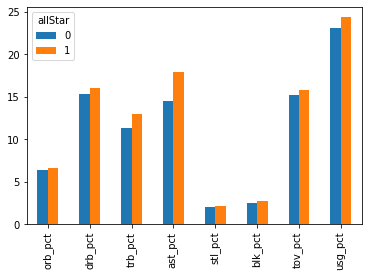

In [50]:
plotGroupBarPlot(mean_statistics.T, ["fg_p", "fg2_p", "fg3_p", "ft_p"])
plotGroupBarPlot(mean_statistics.T, ["obpm", "dbpm", "bpm"])
plotGroupBarPlot(mean_statistics.T, ["orb_pct", "drb_pct", "trb_pct", "ast_pct",
                                     "stl_pct", "blk_pct", "tov_pct", "usg_pct"])

In [51]:
features.to_csv("dataMeanCompleted.csv")

In [52]:
test = features.groupby(["year_drafted", "round", "pick_overall", "player", "school_name"], as_index=False).mean()
test.to_csv("dataMeanPerCollege.csv")

In [53]:
from sklearn.metrics import classification_report as scor

def evaluate(model, test_features, test_labels, treshold):
    predictions = model.predict(test_features)
    print(scor(test_labels, np.where(predictions > treshold, 1, 0),
                target_names = ["NOT All-Star", "All-Star"])
         )
#     error = abs(predictions - test_labels)
#     error_allStars = np.mean(np.take(error, np.where(test_labels == 1)))
#     error_nonAllStars = np.mean(np.take(error, np.where(test_labels == 0)))
#     height = [error_allStars, error_nonAllStars]
#     bars = ("Error All-Stars", "Error Not All-Stars")
#     y_pos =  np.arange(len(bars))
#     plt.bar(y_pos, height, align="center")
#     plt.xticks(y_pos, bars)
#     plt.ylabel("Error%")
#     plt.title("Evaluation")
#     plt.show()
#     print("Error All-Stars:", error_allStars)
    
#     print(predictions)
#     print("Confusion matrix:", confusion_matrix(test_labels, predictions))
#     print("Classification report:", classification_report(test_labels, predictions))
#     print("Accuracy: ", accuracy_score(test_labels, predictions))

In [54]:
def printFeatureImportance(rf, feature_list):
    importances = list(rf.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return feature_importances

In [55]:
def getTrainTest(features):
    np_labels = np.array(features["allStar"])
    temp_features = features.drop(columns=["allStar"])
    feature_list = list(features.columns)
    np_features = np.array(temp_features)
    train_features, test_features, train_labels, test_labels = train_test_split(np_features, 
                                                                                np_labels,
                                                                                test_size = 0.25,
                                                                                random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def randomForest_train_variableImportane(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list
    

In [57]:
features.columns

Index(['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'per', 'obpm',
       'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct', 'trb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg',
       'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'year_drafted', 'round',
       'pick_overall', 'allStar', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p',
       'trb_p', 'ast_p', 'stl_p', 'blk_p'],
      dtype='object')

In [58]:
list_meta_data = ['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr']
list_numeric_features = ['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod',
       'round', 'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p']
fetures_select_all = list_numeric_features + ["allStar"]

In [59]:
rf_base, test_features_base, test_labels_base, feature_list_base = randomForest_train_variableImportane(features[fetures_select_all])

In [60]:
treshold = 0.5
evaluate(rf_base, test_features_base, test_labels_base, treshold)
feature_importans = printFeatureImportance(rf_base, feature_list_base)

              precision    recall  f1-score   support

NOT All-Star       0.88      1.00      0.94       145
    All-Star       1.00      0.17      0.29        24

    accuracy                           0.88       169
   macro avg       0.94      0.58      0.61       169
weighted avg       0.90      0.88      0.84       169

Variable: pick_overall         Importance: 0.16
Variable: ws                   Importance: 0.06
Variable: dws                  Importance: 0.05
Variable: trb_p                Importance: 0.05
Variable: ast_pct              Importance: 0.04
Variable: ows                  Importance: 0.04
Variable: pts_pg               Importance: 0.04
Variable: ast_p                Importance: 0.04
Variable: stl_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: blk_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
V

In [61]:
# we take the firs 10 most important features
list_selected_features = [x[0] for x in feature_importans[:10]]
list_selected_features.append("allStar")

In [62]:
rf_top, test_features_top, test_labels_top, feature_list_top = randomForest_train_variableImportane(features[list_selected_features])

In [63]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)
printFeatureImportance(rf_top, feature_list_top)

              precision    recall  f1-score   support

NOT All-Star       0.88      0.99      0.94       145
    All-Star       0.83      0.21      0.33        24

    accuracy                           0.88       169
   macro avg       0.86      0.60      0.63       169
weighted avg       0.88      0.88      0.85       169

Variable: pick_overall         Importance: 0.25
Variable: ws                   Importance: 0.11
Variable: trb_p                Importance: 0.1
Variable: dws                  Importance: 0.09
Variable: ast_pct              Importance: 0.08
Variable: ows                  Importance: 0.08
Variable: pts_pg               Importance: 0.08
Variable: stl_p                Importance: 0.08
Variable: ast_p                Importance: 0.07
Variable: ts_pct               Importance: 0.07


[('pick_overall', 0.25),
 ('ws', 0.11),
 ('trb_p', 0.1),
 ('dws', 0.09),
 ('ast_pct', 0.08),
 ('ows', 0.08),
 ('pts_pg', 0.08),
 ('stl_p', 0.08),
 ('ast_p', 0.07),
 ('ts_pct', 0.07)]

In [64]:
from sklearn.ensemble import RandomForestClassifier

def randomForestWeight(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    weight = "balanced"
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42, class_weight=weight)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list

In [65]:
rf_weight_top, test_features_weight_top , test_labels_weight_top, feature_list_weight_top = randomForestWeight(features[list_selected_features])

In [66]:
treshold = 0.5
evaluate(rf_weight_top, test_features_weight_top, test_labels_weight_top, treshold)
printFeatureImportance(rf_weight_top, feature_list_weight_top)

              precision    recall  f1-score   support

NOT All-Star       0.87      0.99      0.93       145
    All-Star       0.60      0.12      0.21        24

    accuracy                           0.86       169
   macro avg       0.74      0.56      0.57       169
weighted avg       0.83      0.86      0.82       169

Variable: pick_overall         Importance: 0.31
Variable: stl_p                Importance: 0.11
Variable: ws                   Importance: 0.1
Variable: trb_p                Importance: 0.09
Variable: dws                  Importance: 0.08
Variable: ast_pct              Importance: 0.07
Variable: ows                  Importance: 0.07
Variable: ast_p                Importance: 0.06
Variable: ts_pct               Importance: 0.06
Variable: pts_pg               Importance: 0.05


[('pick_overall', 0.31),
 ('stl_p', 0.11),
 ('ws', 0.1),
 ('trb_p', 0.09),
 ('dws', 0.08),
 ('ast_pct', 0.07),
 ('ows', 0.07),
 ('ast_p', 0.06),
 ('ts_pct', 0.06),
 ('pts_pg', 0.05)]

In [67]:
rf_weight_base, test_features_weight_base, test_labels_weight_base, feature_list_weight_base = randomForestWeight(features[fetures_select_all])

In [68]:
treshold = 0.5
evaluate(rf_weight_base, test_features_weight_base, test_labels_weight_base, treshold)
printFeatureImportance(rf_weight_base, feature_list_weight_base)

              precision    recall  f1-score   support

NOT All-Star       0.88      0.99      0.93       145
    All-Star       0.80      0.17      0.28        24

    accuracy                           0.88       169
   macro avg       0.84      0.58      0.60       169
weighted avg       0.87      0.88      0.84       169

Variable: pick_overall         Importance: 0.19
Variable: ws                   Importance: 0.06
Variable: round                Importance: 0.06
Variable: stl_p                Importance: 0.06
Variable: dws                  Importance: 0.05
Variable: ast_pct              Importance: 0.04
Variable: ows                  Importance: 0.04
Variable: trb_p                Importance: 0.04
Variable: per                  Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: stl_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: pts_pg               Importance: 0.03
Variable: ast_p                Importance: 0.03
V

[('pick_overall', 0.19),
 ('ws', 0.06),
 ('round', 0.06),
 ('stl_p', 0.06),
 ('dws', 0.05),
 ('ast_pct', 0.04),
 ('ows', 0.04),
 ('trb_p', 0.04),
 ('per', 0.03),
 ('trb_pct', 0.03),
 ('stl_pct', 0.03),
 ('tov_pct', 0.03),
 ('pts_pg', 0.03),
 ('ast_p', 0.03),
 ('blk_p', 0.03),
 ('obpm', 0.02),
 ('bpm', 0.02),
 ('ts_pct', 0.02),
 ('efg_pct', 0.02),
 ('blk_pct', 0.02),
 ('usg_pct', 0.02),
 ('fg_p', 0.02),
 ('fg2_p', 0.02),
 ('fg3_p', 0.02),
 ('ft_p', 0.02),
 ('dbpm', 0.01),
 ('orb_pct', 0.01),
 ('drb_pct', 0.01),
 ('off_rtg', 0.01),
 ('def_rtg', 0.01),
 ('pprod', 0.01)]

# Chestii avansate pe care nu le-am inteles

In [79]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'bootstrap': [True, False]}

In [70]:

train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features[fetures_select_all])

In [80]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [81]:
rf_random.best_params_

{'n_estimators': 1600,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [82]:
evaluate(rf_random.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(rf_random.best_estimator_, feature_list)

              precision    recall  f1-score   support

NOT All-Star       0.88      1.00      0.94       145
    All-Star       1.00      0.17      0.29        24

    accuracy                           0.88       169
   macro avg       0.94      0.58      0.61       169
weighted avg       0.90      0.88      0.84       169

Variable: pick_overall         Importance: 0.17
Variable: ws                   Importance: 0.06
Variable: dws                  Importance: 0.05
Variable: trb_p                Importance: 0.05
Variable: ast_pct              Importance: 0.04
Variable: ows                  Importance: 0.04
Variable: pts_pg               Importance: 0.04
Variable: ast_p                Importance: 0.04
Variable: stl_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: blk_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
V

In [83]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features' : [5, 10, 20, 30, "log2", "sqrt"],
    'max_depth':[int(x) for x in np.linspace(10, 100, num = 10)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = -1, verbose = 2)


In [84]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 59.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 71.1min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 105.9min finished
/home/minescoviciu/Facultate/tcri-

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [93]:
best= grid_search.best_estimator_
best

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=30,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [92]:
evaluate(grid_search.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search.best_estimator_, feature_list)

              precision    recall  f1-score   support

NOT All-Star       0.90      0.97      0.93       145
    All-Star       0.67      0.33      0.44        24

    accuracy                           0.88       169
   macro avg       0.78      0.65      0.69       169
weighted avg       0.87      0.88      0.86       169

Variable: pick_overall         Importance: 0.4
Variable: dws                  Importance: 0.14
Variable: ows                  Importance: 0.07
Variable: stl_pct              Importance: 0.06
Variable: drb_pct              Importance: 0.05
Variable: dbpm                 Importance: 0.04
Variable: ast_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: ts_pct               Importance: 0.02
Variable: efg_pct              Importance: 0.02
Variable: blk_p                Importance: 0.02
Variable: obpm                 Importance: 0.01
Variable: bpm                  Importance: 0.01
Variable: usg_pct              Importance: 0.01
Va

In [103]:
from sklearn.tree import export_graphviz
# Export as dot file
fetures_name = features[fetures_select_all].drop(columns="allStar").columns
export_graphviz(best.estimators_[13], out_file='tree.dot', 
                feature_names = fetures_name,
                class_names = ["All-Star", "NOT All-Star"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [101]:
features[fetures_select_all].drop(columns="allStar").columns

Index(['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'round',
       'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p', 'trb_p',
       'ast_p', 'stl_p', 'blk_p'],
      dtype='object')